# Bonus tasks
##### 1. Sentiment analysis - relation between the sentiment and price, Were people who paid more also more satisfied?
##### 2. Seasons - What high seasons did you identify? How do the seasons differ for different locations

In [1]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns


## 1. Sentiment analysis

### Load data

In [2]:
data = pd.read_csv('reviews.csv')

In [3]:
data.head()
data = pd.DataFrame.drop(data, columns=[
    'id',
    'date',
    'reviewer_id',
    'reviewer_name'
])


### Define function

In [4]:
def calculate_sentiment(entry): 
    if (type(entry) != str and math.isnan(entry)):
        return -99
    opinion = TextBlob(entry) #determine the sentiment of the review
    return opinion.sentiment.polarity #returns a polarity score for the review, where the score is a float within the range [-1.0 , 1.0]
#-1 negative, 1 positive


In [5]:
data['comments_sentiment'] = data['comments'].apply(calculate_sentiment) #apply funkcion
data = data[data['comments_sentiment'] != -99]


### Histogram

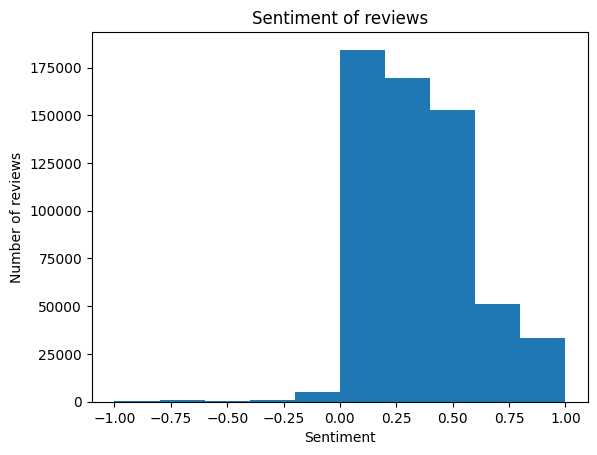

In [6]:
plt.hist(data['comments_sentiment'])
plt.title('Sentiment of reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()


### Save data

In [7]:
average_sentiment = data.groupby('listing_id')['comments_sentiment'].mean()
average_sentiment_df = average_sentiment.reset_index()

In [9]:
average_sentiment_df.to_csv('reviews_cleaned_TextBlob.csv')

### Merge data

In [10]:
reviews = pd.read_csv('reviews_cleaned_TextBlob.csv')#comments_sentiment
price = pd.read_csv('data_cleaned.csv') #price
merged_data = pd.merge(reviews, price, left_on='listing_id', right_on='id')

### Price vs sentiment of reviews

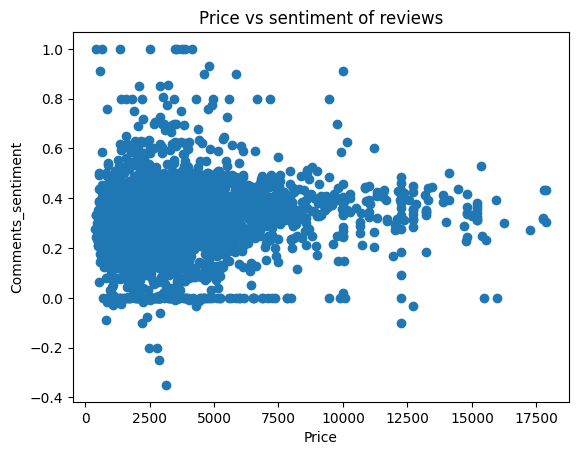

In [11]:
plt.scatter(merged_data['price'], merged_data['comments_sentiment'] )
plt.title('Price vs sentiment of reviews')
plt.xlabel('Price')
plt.ylabel('Comments_sentiment')
plt.show()

### Correlation matrix

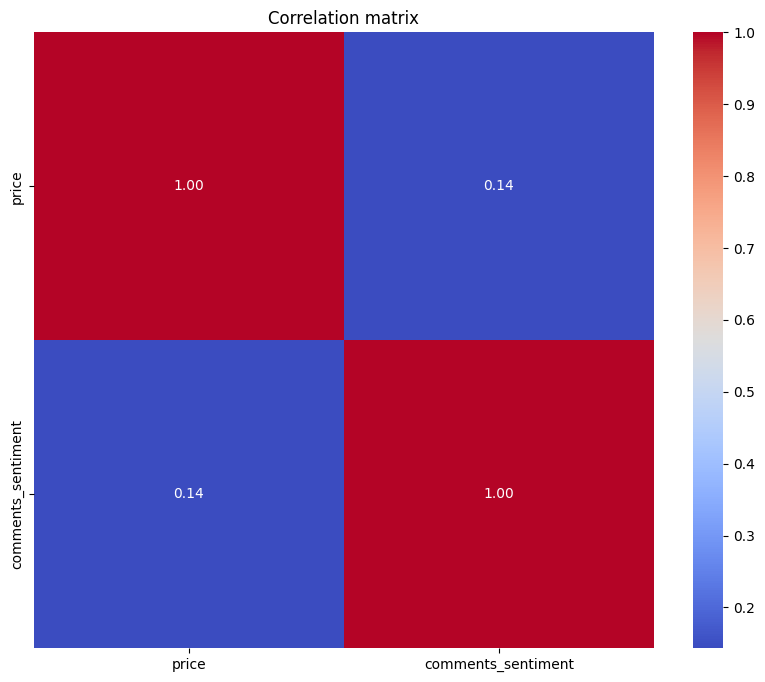

In [12]:
correlation_matrix = merged_data[['price', 'comments_sentiment']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

#### From correlation matrix, we can clearly see that sentiment of reviews and the price of a listing has a very weak positive correlation. 

## 2. Seasons

### Load data

In [13]:
calendar = pd.read_csv('calendar.csv')
calendar['date'] = pd.to_datetime(calendar['date'])# Date to datetime

In [14]:
# Number of reservations days
occupied_days = calendar[calendar['available'] == 'f'].groupby('date').size()
# Moving average
moving_avg_occupied = occupied_days.rolling(window=7).mean()

### Graph Number of reservations

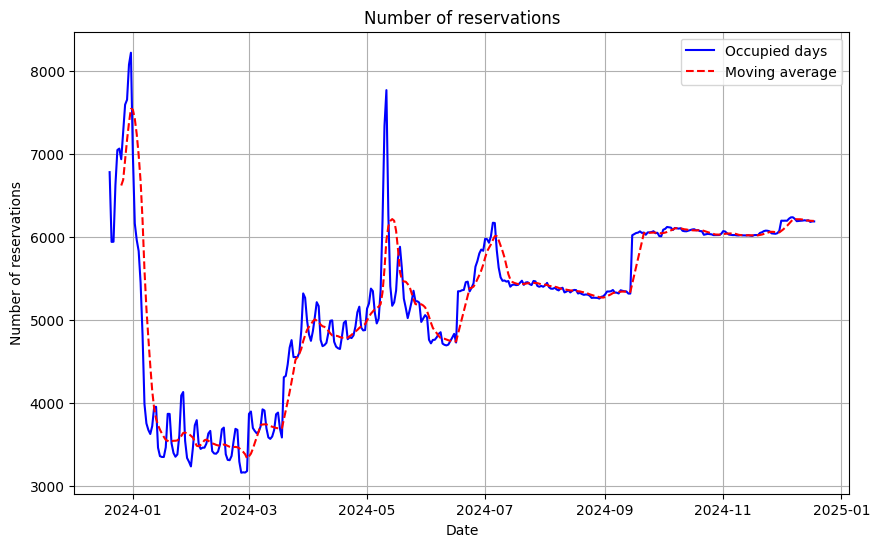

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(occupied_days.index, occupied_days.values, label='Occupied days', color='blue')
plt.plot(moving_avg_occupied.index, moving_avg_occupied.values, color='red', linestyle='--', label='Moving average')
plt.title('Number of reservations')
plt.xlabel('Date')
plt.ylabel('Number of reservations')
plt.legend()
plt.grid(True)
plt.show()

### Load data

In [16]:
location = pd.read_csv('data_cleaned.csv')#location
# Replace values in column 'neighbourhood_cleansed'
location['neighbourhood_cleansed'] = location['neighbourhood_cleansed'].replace({
    'Troja': 'Praha 8',
    'Lysolaje': 'Praha 6'
})
merged_data = pd.merge(calendar, location, left_on='listing_id', right_on='id')#Merge data by listing_id
grouped_data = merged_data[merged_data['available'] == 'f'].groupby('neighbourhood_cleansed') #group by location

# Number of reservations for Location
reservations_by_location = grouped_data['available'].count().sort_values(ascending=False)

### Graph Location

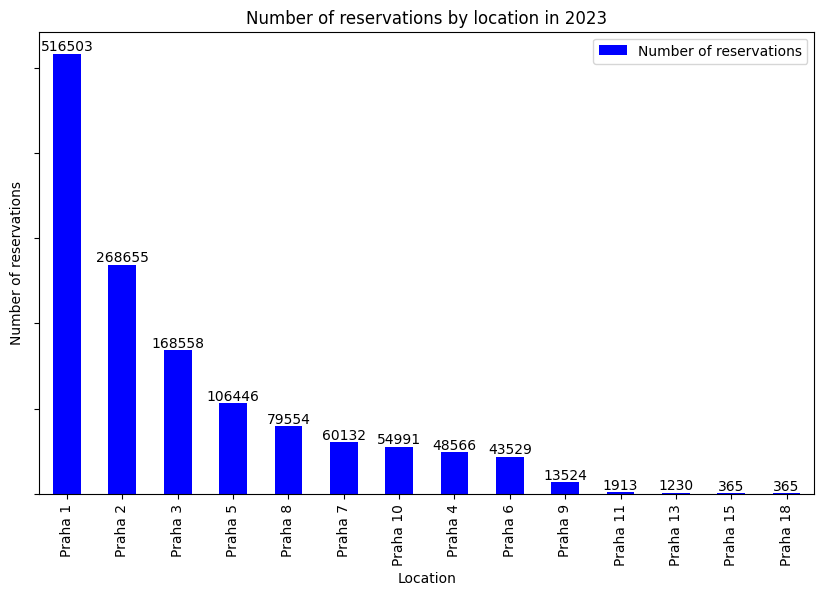

In [17]:
plt.figure(figsize=(10, 6))
ax = reservations_by_location.plot(kind='bar', color='blue', label='Number of reservations')
plt.title('Number of reservations by location in 2023')
plt.xlabel('Location')
plt.ylabel('Number of reservations')
plt.legend()
ax.set_yticklabels([])
# Add text for every column
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, str(int(i.get_height())), ha='center', va='bottom')
plt.show()